In [1]:
# activate env: conda activate /usr/local/Caskroom/miniconda/base/envs/MSE244
# !pip install tqdm

import databento as db
import numpy as np
import pandas as pd
import difflib
from collections import defaultdict
import matplotlib.pyplot as plt
import os
from tqdm import tqdm

## Stock

In [2]:
# Save streamed data to .dbn.zst
FIRST_MONTH_PATH = "../data/stock/xnas-itch-20230501-20230531.ohlcv-1m.dbn.zst"
path = FIRST_MONTH_PATH

# Read saved .dbn.zst
stored_data = db.DBNStore.from_file(path)

# Convert to dataframe
df = stored_data.to_df()
# print(df.head())


In [3]:
# APPL
df = df[df['symbol'] == 'AAPL']
df.head(20)

,rtype,publisher_id,instrument_id,open,high,low,close,volume,symbol
ts_event,,,,,,,,,
2023-05-01 08:00:00+00:00,33,2,30,169.57,169.63,169.43,169.57,434,AAPL
2023-05-01 08:01:00+00:00,33,2,30,169.55,169.56,169.36,169.36,64,AAPL
2023-05-01 08:02:00+00:00,33,2,30,169.38,169.40,169.38,169.40,25,AAPL
2023-05-01 08:03:00+00:00,33,2,30,169.39,169.50,169.39,169.50,446,AAPL
2023-05-01 08:05:00+00:00,33,2,30,169.48,169.48,169.41,169.47,321,AAPL
2023-05-01 08:06:00+00:00,33,2,30,169.34,169.34,169.28,169.28,137,AAPL
2023-05-01 08:08:00+00:00,33,2,30,169.08,169.08,169.02,169.02,958,AAPL
2023-05-01 08:09:00+00:00,33,2,30,169.04,169.04,169.04,169.04,5,AAPL
2023-05-01 08:10:00+00:00,33,2,30,169.04,169.04,169.01,169.01,281,AAPL


## Options

In [4]:
# Save streamed data to .dbn.zst
# path = "../data/options/APPL/opra-pillar-20240429.ohlcv-1m.dbn.zst"

# # Read saved .dbn.zst
# stored_data = db.DBNStore.from_file(path)

# # Convert to dataframe
# df_options = stored_data.to_df()

In [5]:
# folder_path = "../data/options/AAPL/"
folder_path = "../data/options/best_pair/"
month_name = "202404"

df_options = pd.DataFrame()

# List all files in the folder
files = [f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f))]
# restrict to ones with prefix
files = [f for f in files if f.startswith(f"opra-pillar-{month_name}")] 

for file_name in tqdm(sorted(files), desc="Processing files"):
    path = folder_path + file_name
    stored_data = db.DBNStore.from_file(path)
    month_options = stored_data.to_df()
    # df_options = df_options[df_options['symbol'] == 'AAPL']
    df_options = pd.concat([df_options, month_options])

df_options

Processing files:   0%|          | 0/21 [00:00<?, ?it/s]

Processing files: 100%|██████████| 21/21 [00:00<00:00, 76.97it/s]


,rtype,publisher_id,instrument_id,open,high,low,close,volume,symbol
ts_event,,,,,,,,,
2024-04-01 13:30:00+00:00,33,26,939543376,0.04,0.04,0.04,0.04,1,PCG 240405C00017500
2024-04-01 13:30:00+00:00,33,25,939536949,0.30,0.30,0.30,0.30,10,PCG 240621C00018000
2024-04-01 13:30:00+00:00,33,25,939526251,0.08,0.08,0.08,0.08,7,PCG 240405P00016500
2024-04-01 13:30:00+00:00,33,22,956302784,0.27,0.27,0.27,0.27,20,PCG 240426P00016500
2024-04-01 13:30:00+00:00,33,35,939549471,0.48,0.48,0.48,0.48,20,PCG 240517C00017000
...,...,...,...,...,...,...,...,...,...
2024-04-29 19:51:00+00:00,33,26,939524505,0.72,0.72,0.72,0.72,125,PCG 240621C00017000
2024-04-29 19:51:00+00:00,33,32,939524505,0.73,0.73,0.73,0.73,125,PCG 240621C00017000
2024-04-29 19:53:00+00:00,33,22,939550938,0.22,0.22,0.22,0.22,1,PCG 250117P00012000


In [6]:
# Group the DataFrame by 'ts_event' and 'symbol'
grouped = df_options.groupby(['ts_event', 'symbol'])

# Create a new DataFrame with the merged columns as lists
merged_df = grouped.agg(list).reset_index()

# set index to ts_event
merged_df.set_index('ts_event', inplace=True)

# sort by index then symbol
merged_df.sort_values(by=['ts_event', 'symbol'], inplace=True)

merged_df

,symbol,rtype,publisher_id,instrument_id,open,high,low,close,volume
ts_event,,,,,,,,,
2024-04-01 13:30:00+00:00,PCG 240405C00017500,[33],[26],[939543376],[0.04],[0.04],[0.04],[0.04],[1]
2024-04-01 13:30:00+00:00,PCG 240405P00016500,[33],[25],[939526251],[0.08],[0.08],[0.08],[0.08],[7]
2024-04-01 13:30:00+00:00,PCG 240412C00017000,[33],[35],[956319726],[0.15],[0.15],[0.15],[0.15],[1]
2024-04-01 13:30:00+00:00,PCG 240419C00016500,[33],[26],[939538237],[0.52],[0.52],[0.52],[0.52],[1]
2024-04-01 13:30:00+00:00,PCG 240419P00016500,[33],[35],[939543922],[0.19],[0.19],[0.19],[0.19],[3]
...,...,...,...,...,...,...,...,...,...
2024-04-29 19:50:00+00:00,PCG 240621C00018000,"[33, 33]","[32, 29]","[939551682, 939551682]","[0.27, 0.27]","[0.27, 0.27]","[0.27, 0.27]","[0.27, 0.27]","[2, 2]"
2024-04-29 19:51:00+00:00,PCG 240621C00017000,"[33, 33]","[26, 32]","[939524505, 939524505]","[0.72, 0.73]","[0.72, 0.73]","[0.72, 0.73]","[0.72, 0.73]","[125, 125]"
2024-04-29 19:53:00+00:00,PCG 250117P00012000,[33],[22],[939550938],[0.22],[0.22],[0.22],[0.22],[1]


In [7]:
# Average accross different sources for the same option at the same time

# Create new columns for the averages
merged_df['avg_open'] = merged_df['open'].apply(lambda x: np.mean(x))
merged_df['avg_high'] = merged_df['high'].apply(lambda x: np.mean(x))
merged_df['avg_low'] = merged_df['low'].apply(lambda x: np.mean(x))
merged_df['avg_close'] = merged_df['close'].apply(lambda x: np.mean(x))
merged_df['avg_volume'] = merged_df['volume'].apply(lambda x: np.mean(x))
merged_df

,symbol,rtype,publisher_id,instrument_id,open,high,low,close,volume,avg_open,avg_high,avg_low,avg_close,avg_volume
ts_event,,,,,,,,,,,,,,
2024-04-01 13:30:00+00:00,PCG 240405C00017500,[33],[26],[939543376],[0.04],[0.04],[0.04],[0.04],[1],0.040,0.040,0.040,0.040,1.0
2024-04-01 13:30:00+00:00,PCG 240405P00016500,[33],[25],[939526251],[0.08],[0.08],[0.08],[0.08],[7],0.080,0.080,0.080,0.080,7.0
2024-04-01 13:30:00+00:00,PCG 240412C00017000,[33],[35],[956319726],[0.15],[0.15],[0.15],[0.15],[1],0.150,0.150,0.150,0.150,1.0
2024-04-01 13:30:00+00:00,PCG 240419C00016500,[33],[26],[939538237],[0.52],[0.52],[0.52],[0.52],[1],0.520,0.520,0.520,0.520,1.0
2024-04-01 13:30:00+00:00,PCG 240419P00016500,[33],[35],[939543922],[0.19],[0.19],[0.19],[0.19],[3],0.190,0.190,0.190,0.190,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-04-29 19:50:00+00:00,PCG 240621C00018000,"[33, 33]","[32, 29]","[939551682, 939551682]","[0.27, 0.27]","[0.27, 0.27]","[0.27, 0.27]","[0.27, 0.27]","[2, 2]",0.270,0.270,0.270,0.270,2.0
2024-04-29 19:51:00+00:00,PCG 240621C00017000,"[33, 33]","[26, 32]","[939524505, 939524505]","[0.72, 0.73]","[0.72, 0.73]","[0.72, 0.73]","[0.72, 0.73]","[125, 125]",0.725,0.725,0.725,0.725,125.0
2024-04-29 19:53:00+00:00,PCG 250117P00012000,[33],[22],[939550938],[0.22],[0.22],[0.22],[0.22],[1],0.220,0.220,0.220,0.220,1.0


In [8]:
def get_closest_option_prefix(stock_ticker, delta, current_time):
    """
    Generates an option prefix string for a given stock ticker, adjusted by a specified number of days.

    Parameters:
    stock_ticker (str): The stock ticker symbol. It will be padded to 6 characters if shorter.
    delta (int): The number of days to add to the current_time to determine the future date.
    current_time (pd.Timestamp): The current date and time. Should be in the format 'YYYY-MM-DD HH:MM:SS+00:00'.

    Returns:
    str: A string combining the stock ticker (padded to 6 characters) and the future date in 'YYMMDD' format.

    Example:
    get_closest_option_prefix("AAPL", 30, pd.Timestamp("2024-04-29 13:30:00+00:00"))
    will return 'AAPL240529' (assuming the current date is April 29, 2024 and delta is 30 days).
    """
    # Get the date in the future
    future_date = current_time + pd.DateOffset(days=delta)

    # Convert future date to format YYMMDD
    future_date_str = future_date.strftime('%y%m%d')

    # Pad stock ticker up to 6 characters
    stock_ticker = stock_ticker.ljust(6)

    return f"{stock_ticker}{future_date_str}"

get_closest_option_prefix("AAPL", 30, pd.Timestamp("2024-04-29 13:30:00+00:00"))

'AAPL  240529'

In [9]:
def find_index(prefix, ids):
    """
    Finds the index at which a given prefix should be inserted in a sorted list of IDs to maintain order.

    This function uses a binary search algorithm to efficiently determine the insertion index.

    Parameters:
    prefix (str): The prefix string to be inserted.
    ids (list of str): A list of strings representing IDs, assumed to be sorted in ascending order.

    Returns:
    int: The index at which the prefix should be inserted to maintain the sorted order of the list.

    Example:
    find_index('ABC123', ['AAA111', 'BBB222', 'CCC333'])
    will return 1, as 'ABC123' should be inserted between 'AAA111' and 'BBB222'.
    """
    left, right = 0, len(ids)
    while left < right:
        mid = (left + right) // 2
        if ids[mid] < prefix:
            left = mid + 1
        else:
            right = mid

    return left

def select_closest_option(df_at_time, stock_ticker, delta, current_time, option_type="C"):
    """
    Selects the closest option(s) for a given stock ticker, date delta, and option type from a DataFrame or Series.

    Parameters:
    df_at_time (pd.DataFrame or pd.Series): A DataFrame or Series containing option data at a specific time.
                                            Assumes that the DataFrame/Series has a 'symbol' column/attribute with option symbols.
    stock_ticker (str): The stock ticker symbol.
    delta (int): The number of days to add to the current_time to determine the target date for the option.
    current_time (pd.Timestamp): The current date and time.
    option_type (str): The type of option to select ("C" for call, "P" for put). Default is "C".

    Returns:
    list: A list of option symbols closest to the desired target date and of the specified option type.

    Example:
    select_closest_option(df, "AAPL", 30, pd.Timestamp("2024-04-29 13:30:00+00:00"), option_type="C")
    might return a list of call option symbols for AAPL with expiration dates close to 30 days after April 29, 2024.
    """
    # Get the closest option prefix using the provided stock ticker, delta, and current time
    closest_option_prefix = get_closest_option_prefix(stock_ticker, delta, current_time)

    # Extract the list of available option symbols from the DataFrame/Series
    if isinstance(df_at_time, pd.Series):
        options_at_time = [df_at_time["symbol"]]
    else:
        options_at_time = df_at_time["symbol"].values

    # Restrict the options to the desired type (call or put)
    # The option type is indicated by the character 9 positions from the end of the symbol string
    options_at_time = [option for option in options_at_time if option[-9] == option_type]

    # Find the index of the closest option prefix in the list of options
    closest_indx = find_index(closest_option_prefix, options_at_time)

    # Define the radius of options to be considered around the closest index
    radius = 0
    closest_options = options_at_time[closest_indx - radius : closest_indx + radius + 1]

    return closest_options

# select_closest_option(merged_df, "AAPL", 30, pd.Timestamp("2024-04-29 13:30:00+00:00"), option_type="C")

timestamp_test = pd.Timestamp("2024-04-17 20:00:00+00:00")
timestamp_test = pd.Timestamp("2024-04-29 13:30:00+00:00")
df_at_time = merged_df.loc[timestamp_test]
select_closest_option(df_at_time, "AAPL", 30, timestamp_test, option_type="P")

['JKHY  240517P00155000']

In [80]:
# df_trades = pd.read_csv("../output/AAPL_MSFT_trades.csv", index_col=0, parse_dates=True)
# best pair
tickers = ("JKHY", "PCG")

# popular stocks
# tickers = ("AAPL", "MSFT")

# df_trades = pd.read_csv(f"../output/{tickers[0]}_{tickers[1]}_trades.csv", index_col=0, parse_dates=True)
# # df_trades = df_trades[[f"{tickers[0]}_trade", f"{tickers[1]}_trade"]]
# df_trades = df_trades[[f"{tickers[1]}_trade"]]
# df_trades

In [81]:
# df_trades["PCG_trade"].value_counts()

In [82]:
def get_trade_decision(df_trades, stock_ticker, time_stamp):
    try:
        trade = df_trades.loc[time_stamp][f"{stock_ticker}_trade"]
        # print(trade)
        if trade == "nan" or trade == "NaN": return None
        # print(trade)
        return trade
    except:
        return None
    

# get_trade_decision(df_trades, "AAPL", "2024-04-01 08:11:00+00:00")
# get_trade_decision(df_trades, "AAPL", "2024-04-30 23:54:00+00:00")
# get_trade_decision(df_trades, tickers[0], "2024-04-01 13:31:00+00:00")

In [104]:
time_stamps = merged_df.index.unique()
desired_day_to_expiry = 10
    
def create_trades(sig_level):
    ticker1, ticker2 = tickers[0], tickers[1]
    final_pred = pd.read_csv(f"../output/{ticker1}_{ticker2}_final_pred.csv", index_col=0, parse_dates=True)
    # final_pred.set_index("ts_event", inplace=True)
    # final_pred

    # alpha/2
    percentile_5  = final_pred[f'{ticker2}_delta'].quantile(sig_level/2)
    percentile_95 = final_pred[f'{ticker2}_delta'].quantile(1-(sig_level/2))

    # Create the trade column based on the conditions
    final_pred[f'{ticker2}_trade'] = np.where(
        final_pred[f'{ticker2}_delta'] > percentile_95, 'P', 
        np.where(final_pred[f'{ticker2}_delta'] < percentile_5, 'C', np.nan)
    )

    final_pred = final_pred[[f"{ticker2}_trade"]]
    # display(final_pred[f"{ticker2}_trade"].value_counts())
    # display(final_pred[final_pred[f"{ticker2}_trade"] == "P"])

    # return final_pred
    # df_trades = pd.read_csv(f"../output/{tickers[0]}_{tickers[1]}_trades.csv", index_col=0, parse_dates=True)
    # # df_trades = df_trades[[f"{tickers[0]}_trade", f"{tickers[1]}_trade"]]
    # df_trades = df_trades[[f"{ticker2}_trade"]]
    # display(df_trades)
    # display(df_trades[df_trades[f"{ticker2}_trade"] == "P"])
    # display(df_trades.index)

    return final_pred
    # return df_trades

def create_portfolio_from_backtest(sig_level=0.1):
    portfolio = {}
    
    df_trades = create_trades(sig_level)

    for time_stamp in time_stamps:
        # restrict to rows at the current timestamp
        df_at_time = merged_df.loc[time_stamp]

        for ticker_exec in tickers[1:]:
            # get the trade decision
            # print(ticker_exec, time_stamp)
            trade = get_trade_decision(df_trades, ticker_exec, time_stamp)
            if trade is None or isinstance(trade, float): continue
            
            closest_options = select_closest_option(df_at_time, ticker_exec, desired_day_to_expiry, time_stamp, option_type=trade)
            if len(closest_options) == 0: continue
            closest_option = closest_options[0]

            if isinstance(df_at_time, pd.Series):
                # make it a dataframe
                df_at_time = pd.DataFrame(df_at_time).T

            # get the average price of the closest option
            closest_option_row = df_at_time[ df_at_time["symbol"] == closest_option ]

            # get the average price
            avg_open, avg_close = closest_option_row["avg_open"].values[0], closest_option_row["avg_close"].values[0]

            # flip a coin
            # if np.random.rand() > 0.5: continue

            # buy the option
            if closest_option not in portfolio:
                portfolio[closest_option] = {
                    "buy_prices": [],
                    "buy_times": [],
                }

            portfolio[closest_option]["buy_prices"].append(avg_close)
            portfolio[closest_option]["buy_times"].append(time_stamp)

        # break

    return portfolio

def extract_option_data(id):
    """
    Extracts and converts option data from a given option ID string.

    Parameters:
    id (str): The option ID string (e.g., "AAPL  240529C00250000").

    Returns:
    tuple: A tuple containing the stock ticker (str), expiration date (pd.Timestamp), option type (str), and strike price (float).
    """
    stock_ticker = id[:6].strip()
    expiration_date = id[6:12]
    option_type = id[12]
    strike_price = id[13:]

    # Convert expiration date from YYMMDD to YYYY-MM-DD
    expiration_date = pd.to_datetime(expiration_date, format='%y%m%d')

    # Convert strike price to float and divide by 1000
    strike_price = float(strike_price) / 1000

    return stock_ticker, expiration_date, option_type, strike_price

def track_option_value(option_rows):
    """
    Tracks the value of an option over time based on provided data.

    Parameters:
    option_rows (pd.DataFrame): Rows of option data at different timestamps, containing 'avg_open' and 'avg_close'.

    Returns:
    pd.Series: A series of option values over time.
    """
    # Calculate the value of the option at each timestamp
    option_updates = {}  # Dictionary to store times and corresponding prices

    for i in range(len(option_rows)):
        row = option_rows.iloc[i]
        index = option_rows.index[i]
        avg_open, avg_close = row["avg_open"], row["avg_close"]

        # Store the close price as the option value at each timestamp
        option_updates[index] = avg_close

    # Create a series to store option values at each timestamp
    option_values = pd.Series(0.0, index=time_stamps)
    for i in range(len(time_stamps)):
        time_stamp = time_stamps[i]
        if time_stamp in option_updates:
            option_values.iloc[i] = option_updates[time_stamp]
        else:
            option_values.iloc[i] = option_values.iloc[i-1]

    return option_values

def calculate_balance(portfolio):
    """
    Calculates the balance of a portfolio of options over time.

    Parameters:
    portfolio (dict): A dictionary with option tickers as keys and the number held and buy prices as values.

    Returns:
    tuple: A tuple containing two pd.Series - positions and cash balances over time.
    """
    # Initialize positions and cash balances
    positions = pd.Series(0, index=time_stamps)
    cash_start = 100000
    desired_position_size = 100
    cash = pd.Series(cash_start, index=time_stamps)

    # Iterate through each option in the portfolio
    for option in portfolio:
        buy_prices = portfolio[option]["buy_prices"]
        buy_times = portfolio[option]["buy_times"]

        # Get rows corresponding to the option from the DataFrame
        option_rows = merged_df[merged_df["symbol"] == option]

        # Calculate the value of the option at each timestamp
        option_values = track_option_value(option_rows)

        for i in range(len(buy_prices)):
            buy_price, buy_time = buy_prices[i], buy_times[i]

            # Restrict to rows with timestamps after buy_time
            option_values_restricted = option_values[option_values.index > buy_time]

            # Determine the position size to be closest to the desired position size
            position_size = int(desired_position_size / buy_price)

            # Extract option data from the option ID
            stock_ticker, expiration_date, option_type, strike_price = extract_option_data(option)

            # Localize the expiration date to UTC
            expiration_date = expiration_date.tz_localize('UTC')

            # Restrict option values to timestamps before the expiration date
            option_values_restricted = option_values_restricted[option_values_restricted.index < expiration_date]

            # Get the last price before expiration
            if option_values_restricted.empty: continue
            last_price = option_values_restricted.iloc[-1]

            # Calculate the up-front cost of the position
            cash_restricted = pd.Series(-buy_price * position_size, index=option_values.index[option_values.index > buy_time])

            # Create a series with the last price for timestamps after the expiration date
            post_cash = pd.Series(last_price * position_size, index=time_stamps[time_stamps > expiration_date])

            # Add post_cash to cash_restricted
            cash_restricted = cash_restricted.add(post_cash, fill_value=0)

            # Update positions and cash balances
            positions = positions.add(option_values_restricted * position_size, fill_value=0)
            cash = cash.add(cash_restricted, fill_value=0)

    return positions, cash

portfolio = create_portfolio_from_backtest(sig_level=0.2)
positions, cash = calculate_balance(portfolio)

# display(positions)
# display(cash)

# extract_option_data("SPY   231117P00486000")

# zero's at start as converts cash into stock, best estimate for price is what we bought it for
# time_stamps

In [105]:
portfolio

{'PCG   240426P00016000': {'buy_prices': [0.17, 0.15, 0.16, 0.19, 0.3],
  'buy_times': [Timestamp('2024-04-01 14:00:00+0000', tz='UTC'),
   Timestamp('2024-04-04 13:32:00+0000', tz='UTC'),
   Timestamp('2024-04-04 18:34:00+0000', tz='UTC'),
   Timestamp('2024-04-15 17:32:00+0000', tz='UTC'),
   Timestamp('2024-04-16 19:59:00+0000', tz='UTC')]},
 'PCG   240426C00016500': {'buy_prices': [0.49, 0.49, 0.49, 0.43, 0.17],
  'buy_times': [Timestamp('2024-04-01 14:12:00+0000', tz='UTC'),
   Timestamp('2024-04-01 14:15:00+0000', tz='UTC'),
   Timestamp('2024-04-10 13:46:00+0000', tz='UTC'),
   Timestamp('2024-04-12 13:50:00+0000', tz='UTC'),
   Timestamp('2024-04-16 16:38:00+0000', tz='UTC')]},
 'PCG   240621C00017000': {'buy_prices': [0.56,
   0.63,
   0.6,
   0.65,
   0.67,
   0.69,
   0.62,
   0.66,
   0.76,
   0.75,
   0.51,
   0.6,
   0.57,
   0.6,
   0.46,
   0.33,
   0.61,
   0.6,
   0.76,
   0.76,
   0.725],
  'buy_times': [Timestamp('2024-04-01 14:48:00+0000', tz='UTC'),
   Timestamp('

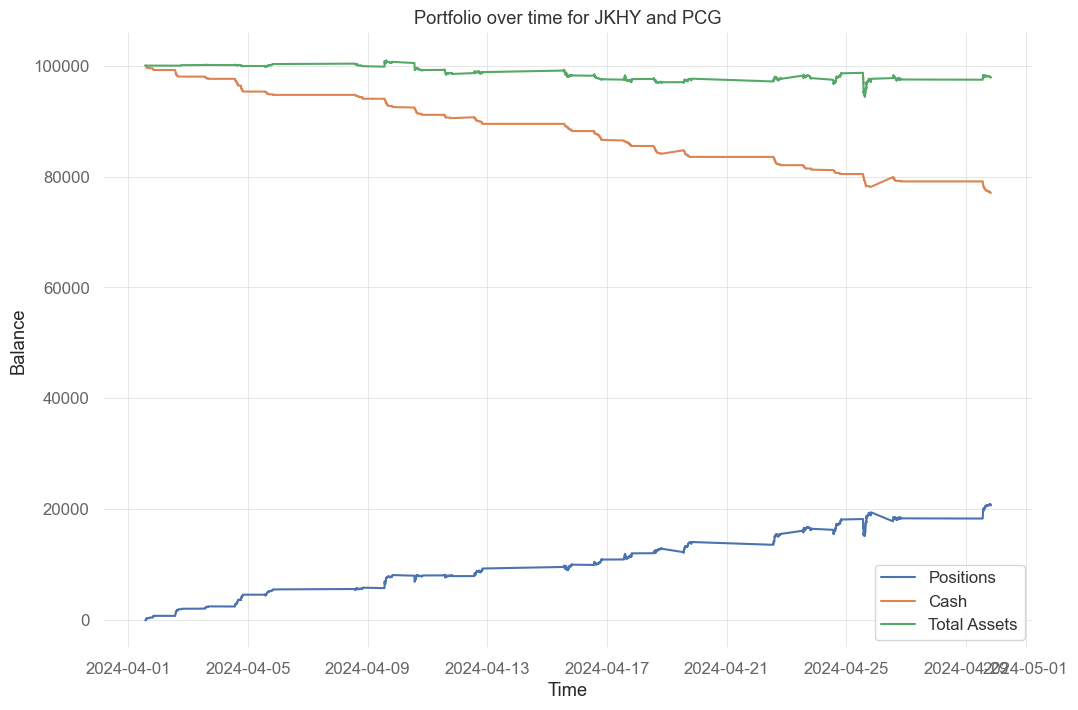

In [106]:
def plot_portfolio(portfolio, positions, cash):
    # plot the balances
    plt.figure(figsize=(12, 8))
    plt.plot(time_stamps, positions)
    plt.plot(time_stamps, cash)

    # Total assets
    total_assets = positions + cash

    plt.plot(time_stamps, total_assets)
    plt.xlabel("Time")
    plt.ylabel("Balance")
    plt.title(f"Portfolio over time for {tickers[0]} and {tickers[1]}")
    plt.legend(["Positions", "Cash", "Total Assets"])
    plt.show()

plot_portfolio(portfolio, positions, cash)

In [107]:
print(positions.iloc[-1] + cash.iloc[-1])

total = positions + cash
portfolio_returns = total.pct_change().dropna()

import quantstats_lumi as qs
qs.reports.html(returns=portfolio_returns)

97877.05380952373


In [92]:
positions_over_sl = []
cash_over_sl = []
sig_levels = []
from tqdm import tqdm

for percent in tqdm(range(0, 20)):
    portfolio = create_portfolio_from_backtest(sig_level=percent / 100.0)
    positions, cash = calculate_balance(portfolio)
    pos_balance = positions.iloc[-1]
    cash_balance = cash.iloc[-1]
    total = positions.iloc[-1] + cash.iloc[-1]
    print(f"{percent / 100.0}: ${total}")
    # print(pos_balance)
    positions_over_sl.append(pos_balance)
    cash_over_sl.append(cash_balance)
    sig_levels.append(percent / 100.0)

# results

  5%|▌         | 1/20 [00:00<00:04,  4.13it/s]

0.0: $100000


 10%|█         | 2/20 [00:03<00:38,  2.15s/it]

0.01: $99917.78499999996


 15%|█▌        | 3/20 [00:06<00:37,  2.22s/it]

0.02: $99986.15166666666


 20%|██        | 4/20 [00:10<00:49,  3.08s/it]

0.03: $99850.69666666663


 25%|██▌       | 5/20 [00:14<00:53,  3.58s/it]

0.04: $99780.32166666661


 30%|███       | 6/20 [00:20<00:57,  4.12s/it]

0.05: $99654.73166666663


 35%|███▌      | 7/20 [00:25<01:01,  4.70s/it]

0.06: $99486.83166666664


 40%|████      | 8/20 [00:31<01:00,  5.01s/it]

0.07: $99480.95166666665


 45%|████▌     | 9/20 [00:37<00:59,  5.40s/it]

0.08: $99191.41166666664


 50%|█████     | 10/20 [00:46<01:02,  6.25s/it]

0.09: $98853.49880952382


 55%|█████▌    | 11/20 [00:52<00:57,  6.38s/it]

0.1: $98640.68880952381


 60%|██████    | 12/20 [01:01<00:55,  6.99s/it]

0.11: $98719.4888095238


 65%|██████▌   | 13/20 [01:08<00:50,  7.17s/it]

0.12: $98538.39380952377


 70%|███████   | 14/20 [01:17<00:45,  7.59s/it]

0.13: $98659.79880952378


 75%|███████▌  | 15/20 [01:25<00:39,  7.82s/it]

0.14: $98266.23380952378


 80%|████████  | 16/20 [01:34<00:32,  8.16s/it]

0.15: $98145.71380952378


 85%|████████▌ | 17/20 [01:42<00:24,  8.21s/it]

0.16: $97989.94380952377


 90%|█████████ | 18/20 [01:52<00:17,  8.70s/it]

0.17: $97911.92380952374


 95%|█████████▌| 19/20 [02:03<00:09,  9.24s/it]

0.18: $97785.45380952372


100%|██████████| 20/20 [02:12<00:00,  6.65s/it]

0.19: $97811.13380952372


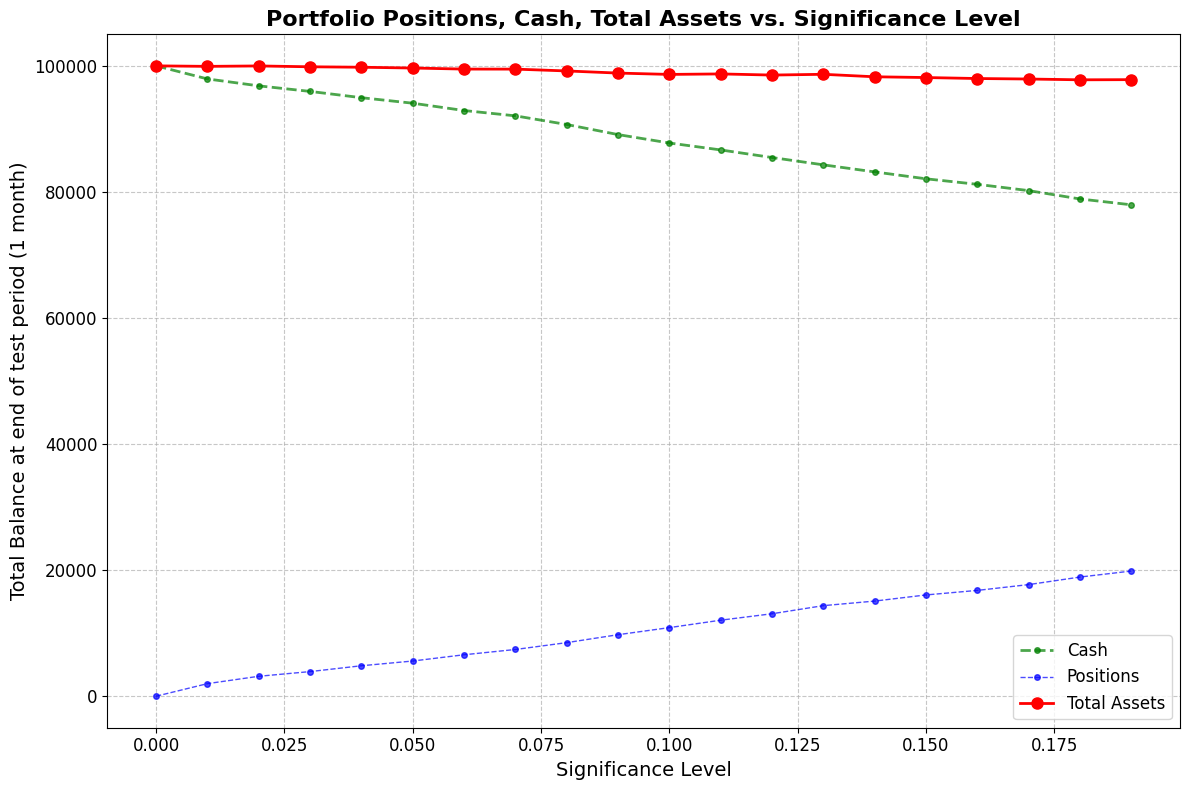

In [94]:
plt.figure(figsize=(12, 8))

# Plot the data
plt.plot(sig_levels, cash_over_sl, marker='o', linestyle='--', color='g', linewidth=2, markersize=4, alpha=0.7, label='Cash')
plt.plot(sig_levels, positions_over_sl, marker='o', linestyle='--', color='b', linewidth=1, markersize=4, alpha=0.7, label='Positions')
total = np.array(cash_over_sl) + np.array(positions_over_sl)
plt.plot(sig_levels, total, marker='o', linestyle='-', color='r', linewidth=2, markersize=8, label='Total Assets')

# Enhancing the graph
plt.xlabel('Significance Level', fontsize=14)
plt.ylabel('Total Balance at end of test period (1 month)', fontsize=14)
plt.title('Portfolio Positions, Cash, Total Assets vs. Significance Level', fontsize=16, fontweight='bold')
plt.legend(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()

# Show the plot
plt.show()

In [96]:
def sharpe_ratio(positions, cash):
    total = positions + cash
    returns = total.pct_change().dropna()
    return returns.mean() / returns.std()

sharpe_ratio(positions, cash)

-0.012706116680406184

ts_event
2024-04-01 13:30:00+00:00    100000.00000
2024-04-01 13:31:00+00:00    100000.00000
2024-04-01 13:32:00+00:00    100000.00000
2024-04-01 13:33:00+00:00    100000.00000
2024-04-01 13:36:00+00:00    100000.00000
                                 ...     
2024-04-29 19:50:00+00:00     97824.69381
2024-04-29 19:51:00+00:00     97774.62381
2024-04-29 19:53:00+00:00     97774.62381
2024-04-29 19:58:00+00:00     97784.61381
2024-04-29 19:59:00+00:00     97811.13381
Length: 2947, dtype: float64